# Import Required Libraries
In this section, we will import the necessary libraries for data manipulation and visualization. We will use pandas for handling the dataset and seaborn/matplotlib for creating the plot.

In [3]:
# Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and Prepare Data
In this section, we will load the dataset containing commit time data, clean it if necessary, and extract the commit time column in milliseconds.

In [4]:
# Load and Prepare Data
# Load the CSV file containing commit time data
file_path = './data/sampled_50k.db.csv'
data = pd.read_csv(file_path)

# Extract the commit time column
commit_times = data['commit_time_ms']

# Visualize Commit Time Distribution
In this section, we will create a plot to visualize the distribution of commit times in milliseconds using a histogram and a kernel density estimate (KDE) plot.

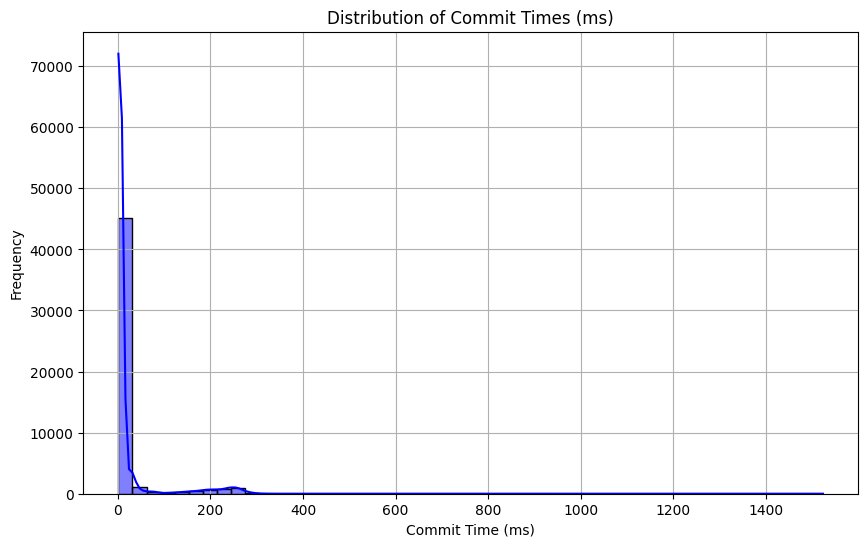

In [5]:
# Visualize Commit Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(commit_times, kde=True, bins=50, color='blue')
plt.title('Distribution of Commit Times (ms)')
plt.xlabel('Commit Time (ms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Compute Commit Time Statistics
In this section, we will calculate the minimum, maximum, and percentile statistics for the commit times.

In [9]:
# Compute Commit Time Statistics
min_time = commit_times.min()
max_time = commit_times.max()
percentiles = commit_times.quantile([0, 0.25, 0.5, 0.75, 1])

print(f"Minimum Commit Time: {min_time} ms")
print(f"Maximum Commit Time: {max_time} ms")
print("Percentiles:")
print(percentiles)

Minimum Commit Time: 1 ms
Maximum Commit Time: 1523 ms
Percentiles:
0.00       1.0
0.25       3.0
0.50       4.0
0.75       6.0
1.00    1523.0
Name: commit_time_ms, dtype: float64


# Top 50 Rows Sorted by Commit Time
In this section, we will display the first 50 rows of the dataset sorted in descending order based on commit time.

In [7]:
# Top 50 Rows Sorted by Commit Time
top_50 = data.sort_values(by='commit_time_ms', ascending=False).head(50)
print(top_50)

       block_nr  num_entities  num_attributes  payload_kb  commit_time_ms  \
15398     15399            51            1312         112            1523   
48558     48559           500            4500          26             897   
10952     10953           500            4500          26             629   
31282     31283           150            2800          45             482   
40987     40988           150            2800          45             466   
38770     38771           153            2827          45             435   
2144       2145           500            4500          26             433   
21325     21326           150            2800          45             397   
32898     32899           150            2800          45             389   
20546     20547            51            1312          75             363   
25874     25875            50            1300           7             358   
44542     44543            50            1300           7             345   

# Correlation Analysis
In this section, we will calculate the correlation coefficients to determine which variable (number of entities, payload size, or number of attributes) correlates most with commit times.

In [8]:
# Correlation Analysis
correlation_matrix = data[['num_entities', 'payload_kb', 'num_attributes', 'commit_time_ms']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Identify the variable most correlated with commit time
most_correlated = correlation_matrix['commit_time_ms'].drop('commit_time_ms').idxmax()
print(f"The variable most correlated with commit time is: {most_correlated}")

Correlation Matrix:
                num_entities  payload_kb  num_attributes  commit_time_ms
num_entities        1.000000   -0.079550        0.954896        0.901366
payload_kb         -0.079550    1.000000       -0.077705       -0.060844
num_attributes      0.954896   -0.077705        1.000000        0.963495
commit_time_ms      0.901366   -0.060844        0.963495        1.000000
The variable most correlated with commit time is: num_attributes
